<a href="https://colab.research.google.com/github/calebgiraa/FantasyFootballAnalysis/blob/main/NFL_Fantasy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load packages

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## Loading Receiving data

In [ ]:
wr_url = "https://www.pro-football-reference.com/years/2023/receiving.htm"
wr_response = requests.get(wr_url)
wr_html_content = wr_response.text

wr_soup = BeautifulSoup(wr_html_content, "html.parser")
wr_table = wr_soup.find("table", {"id": "receiving"})

wr_headers = [th.text for th in wr_table.find('thead').find_all('th')][1:]  # Extract headers from thead

wr_rows = []
for row in wr_table.find('tbody').find_all('tr'):  # Iterate over rows in tbody
    cells = row.find_all('td')
    row_data = [cell.text for cell in cells]
    wr_rows.append(row_data)

wr_df = pd.DataFrame(wr_rows, columns=wr_headers)

wr_df.apply(pd.to_numeric, errors='ignore')

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Succ%,Lng,Y/Tgt,R/G,Y/G,Fmb
0,CeeDee Lamb*+,DAL,24.0,WR,17.0,17.0,181.0,135.0,74.6%,1749.0,13.0,12.0,80.0,63.5,92.0,9.7,7.9,102.9,3.0
1,Tyreek Hill*+,MIA,29.0,WR,16.0,16.0,171.0,119.0,69.6%,1799.0,15.1,13.0,83.0,57.9,78.0,10.5,7.4,112.4,1.0
2,Amon-Ra St. Brown*+,DET,24.0,WR,16.0,16.0,164.0,119.0,72.6%,1515.0,12.7,10.0,75.0,61.6,70.0,9.2,7.4,94.7,1.0
3,Evan Engram*,JAX,29.0,TE,17.0,15.0,143.0,114.0,79.7%,963.0,8.4,4.0,47.0,53.1,34.0,6.7,6.7,56.6,3.0
4,Michael Pittman Jr.,IND,26.0,WR,16.0,15.0,156.0,109.0,69.9%,1152.0,10.6,4.0,53.0,51.9,75.0,7.4,6.8,72.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Trent Taylor,CHI,29.0,WR,17.0,0.0,2.0,0.0,0.0%,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
494,None,None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,Jonathan Williams,WAS,29.0,RB,1.0,0.0,1.0,0.0,0.0%,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,Rodney Williams,PIT,25.0,TE,13.0,0.0,2.0,0.0,0.0%,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cleaning Receiver Data

In [ ]:
cleaned_wr_df = wr_df[['Player', 'Tm', 'G', 'Tgt', 'Rec', 'Yds', 'TD', 'Fmb']].copy()
cleaned_wr_df.columns = ['player', 'team', 'games', 'targets', 'receptions', 'receiving_yards', 'receiving_tds', 'fumbles']

cleaned_wr_df.replace('None', np.nan, inplace=True)
cleaned_wr_df = cleaned_wr_df.dropna(how='all')

cleaned_wr_df.head()

,player,team,games,targets,receptions,receiving_yards,receiving_tds,fumbles
0,CeeDee Lamb*+,DAL,17,181,135,1749,12,3
1,Tyreek Hill*+,MIA,16,171,119,1799,13,1
2,Amon-Ra St. Brown*+,DET,16,164,119,1515,10,1
3,Evan Engram*,JAX,17,143,114,963,4,3
4,Michael Pittman Jr.,IND,16,156,109,1152,4,2


## Loading Rushing Data

In [ ]:
rb_url = "https://www.pro-football-reference.com/years/2023/rushing.htm"
rb_response = requests.get(rb_url)
rb_html_content = rb_response.text

rb_soup = BeautifulSoup(rb_html_content, "html.parser")
rb_table = rb_soup.find("table", {"id": "rushing"})

rb_headers = [th.text for th in rb_table.find('thead').find_all('th')][1:]  # Extract headers from thead
rb_headers.remove('Games')
rb_headers.remove('Rushing')
rb_headers.remove('')
rb_headers.remove('Rk')

rb_rows = []
for row in rb_table.find('tbody').find_all('tr'):  # Iterate over rows in tbody
    cells = row.find_all('td')
    row_data = [cell.text for cell in cells]
    rb_rows.append(row_data)


rb_df = pd.DataFrame(rb_rows, columns=rb_headers)

rb_df.apply(pd.to_numeric, errors='ignore')

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Succ%,Lng,Y/A,Y/G,Fmb
0,Derrick Henry*,TEN,29.0,RB,17.0,17.0,280.0,1167.0,12.0,63.0,46.1,69.0,4.2,68.6,0.0
1,Christian McCaffrey*+,SFO,27.0,RB,16.0,16.0,272.0,1459.0,14.0,83.0,54.0,72.0,5.4,91.2,3.0
2,Rachaad White,TAM,24.0,RB,17.0,17.0,272.0,990.0,6.0,46.0,40.8,38.0,3.6,58.2,3.0
3,Travis Etienne,JAX,24.0,RB,17.0,17.0,267.0,1008.0,11.0,53.0,43.1,62.0,3.8,59.3,0.0
4,Joe Mixon,CIN,27.0,RB,17.0,17.0,257.0,1034.0,9.0,59.0,49.4,44.0,4.0,60.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Jonathan Williams,WAS,29.0,RB,1.0,0.0,1.0,-2.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0
353,Mike Williams,LAC,29.0,WR,3.0,3.0,1.0,3.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0
354,Robert Woods,HOU,31.0,WR,14.0,11.0,1.0,7.0,0.0,0.0,100.0,7.0,7.0,0.5,0.0
355,Logan Woodside,ATL,28.0,QB,1.0,0.0,1.0,6.0,0.0,0.0,100.0,6.0,6.0,6.0,0.0


## Cleaning Rushing Data

In [ ]:
cleaned_rb_df = rb_df[['Player', 'Yds', 'TD']].copy()
cleaned_rb_df.columns = ['player', 'rushing_yards', 'rushing_tds']

cleaned_rb_df.replace('None', np.nan, inplace=True)
cleaned_rb_df = cleaned_rb_df.dropna(how='all')

cleaned_rb_df.head(50)

,player,rushing_yards,rushing_tds
0,Derrick Henry*,1167,12
1,Christian McCaffrey*+,1459,14
2,Rachaad White,990,6
3,Travis Etienne,1008,11
4,Joe Mixon,1034,9
5,Najee Harris,1035,8
6,Tony Pollard,1005,6
7,Saquon Barkley,962,6
8,Chuba Hubbard,902,5
9,James Cook*,1122,2


## Combining WR and RB Data
Since positions such as Wide Receiver, Running Back, and Tight End will usually have a combination of rushing and receiving yards and touchdowns, we'll merge the two together to get total stats

In [ ]:
skill_df = pd.merge(cleaned_wr_df, cleaned_rb_df, how='inner', left_on='player', right_on='player')

skill_df.head(50)

# skill_df.to_csv('skill_df.csv', index=False)

,player,team,games,targets,receptions,receiving_yards,receiving_tds,fumbles,rushing_yards,rushing_tds
0,CeeDee Lamb*+,DAL,17,181,135,1749,12,3,113,2
1,Tyreek Hill*+,MIA,16,171,119,1799,13,1,15,0
2,Amon-Ra St. Brown*+,DET,16,164,119,1515,10,1,24,0
3,Keenan Allen*,LAC,13,150,108,1243,7,2,6,0
4,Stefon Diggs*,BUF,17,160,107,1183,8,2,5,0
5,Puka Nacua*,LAR,17,160,105,1486,6,1,89,0
6,Adam Thielen,CAR,17,137,103,1014,4,2,6,0
7,Ja'Marr Chase*,CIN,16,145,100,1216,7,1,-6,0
8,D.J. Moore,CHI,17,136,96,1364,8,1,21,1
9,Garrett Wilson,NYJ,17,168,95,1042,3,2,0,0


## Loading Passing Data

In [ ]:
qb_url = "https://www.pro-football-reference.com/years/2023/passing.htm"
qb_response = requests.get(qb_url)
qb_html_content = qb_response.text

qb_soup = BeautifulSoup(qb_html_content, "html.parser")
qb_table = qb_soup.find("table", {"id": "passing"})

qb_headers = [th.text for th in qb_table.find('thead').find_all('th')][1:]  # Extract headers from thead

qb_rows = []
for row in qb_table.find('tbody').find_all('tr'):  # Iterate over rows in tbody
    cells = row.find_all('td')
    row_data = [cell.text for cell in cells]
    qb_rows.append(row_data)

qb_df = pd.DataFrame(qb_rows, columns=qb_headers)

qb_df.apply(pd.to_numeric, errors='ignore')

,Player,Age,Team,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Rate,QBR,Sk,Yds,Sk%,NY/A,ANY/A,4QC,GWD,Awards
0,Tua Tagovailoa,25.0,MIA,QB,17.0,17.0,11-6-0,388.0,560.0,69.3,...,101.1,60.8,29.0,171.0,4.92,7.56,7.48,2.0,2.0,"PB,AP CPoY-5"
1,Jared Goff,29.0,DET,QB,17.0,17.0,12-5-0,407.0,605.0,67.3,...,97.9,60.3,30.0,197.0,4.72,6.89,6.99,2.0,3.0,
2,Dak Prescott,30.0,DAL,QB,17.0,17.0,12-5-0,410.0,590.0,69.5,...,105.9,72.7,39.0,255.0,6.20,6.77,7.28,2.0,3.0,"PB,AP-2,AP MVP-2,AP OPoY-5"
3,Josh Allen,27.0,BUF,QB,17.0,17.0,11-6-0,385.0,579.0,66.5,...,92.2,69.6,24.0,152.0,3.98,6.89,6.51,2.0,4.0,"AP MVP-5,AP OPoY-6"
4,Brock Purdy,24.0,SFO,QB,16.0,16.0,12-4-0,308.0,444.0,69.4,...,113.0,72.8,28.0,153.0,5.93,8.74,9.01,0.0,0.0,"PB,AP MVP-4,AP OPoY-6,AP CPoY-6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Chris Godwin,27.0,TAM,WR,17.0,17.0,,0.0,1.0,0.0,...,39.6,0.8,0.0,0.0,0.00,0.00,0.00,0.0,0.0,
114,Kyle Trask,25.0,TAM,QB,2.0,0.0,,0.0,1.0,0.0,...,39.6,1.2,0.0,0.0,0.00,0.00,0.00,0.0,0.0,
115,Christian Kirk,27.0,JAX,WR,12.0,12.0,,1.0,2.0,50.0,...,56.2,3.1,0.0,0.0,0.00,-0.50,-0.50,0.0,0.0,
116,Ja'Marr Chase,23.0,CIN,WR,16.0,16.0,,1.0,1.0,100.0,...,79.2,1.8,0.0,0.0,0.00,-7.00,-7.00,0.0,0.0,PB


## Cleaning Passing Data

In [ ]:
cleaned_qb_df = qb_df[['Player', 'Yds', 'TD', 'Int']].copy()
cleaned_qb_df.columns = ['player', 'passing_yards', 'rushing_yards', 'passing_tds', 'interceptions']

cleaned_qb_df = cleaned_qb_df.drop(columns=['rushing_yards'])

cleaned_qb_df.replace('None', np.nan, inplace=True)
cleaned_qb_df = cleaned_qb_df.dropna(how='all')

cleaned_qb_df.head(50)

,player,passing_yards,passing_tds,interceptions
0,Tua Tagovailoa,4624,29,14
1,Jared Goff,4575,30,12
2,Dak Prescott,4516,36,9
3,Josh Allen,4306,29,18
4,Brock Purdy,4280,31,11
5,Patrick Mahomes,4183,27,14
6,Jordan Love,4159,32,11
7,C.J. Stroud,4108,23,5
8,Baker Mayfield,4044,28,10
9,Trevor Lawrence,4016,21,14


## Combining all previous data frames

In [ ]:
player_df = pd.merge(skill_df, cleaned_qb_df, how='outer', left_on='player', right_on='player')

player_df['player'] = player_df['player'].str.replace('*', '')
player_df['player'] = player_df['player'].str.replace('+', '')

player_df.head(50)

,player,team,games,targets,receptions,receiving_yards,receiving_tds,fumbles,rushing_yards,rushing_tds,passing_yards,passing_tds,interceptions
0,CeeDee Lamb,DAL,17,181,135,1749,12,3,113,2,NaN,NaN,NaN
1,Tyreek Hill,MIA,16,171,119,1799,13,1,15,0,NaN,NaN,NaN
2,Amon-Ra St. Brown,DET,16,164,119,1515,10,1,24,0,NaN,NaN,NaN
3,Keenan Allen,LAC,13,150,108,1243,7,2,6,0,NaN,NaN,NaN
4,Stefon Diggs,BUF,17,160,107,1183,8,2,5,0,NaN,NaN,NaN
5,Puka Nacua,LAR,17,160,105,1486,6,1,89,0,NaN,NaN,NaN
6,Adam Thielen,CAR,17,137,103,1014,4,2,6,0,NaN,NaN,NaN
7,Ja'Marr Chase,CIN,16,145,100,1216,7,1,-6,0,NaN,NaN,NaN
8,D.J. Moore,CHI,17,136,96,1364,8,1,21,1,NaN,NaN,NaN
9,Garrett Wilson,NYJ,17,168,95,1042,3,2,0,0,0,0,0


## Importing ADP Data

In [ ]:
adp_url = "https://fantasydata.com/nfl/adp"
adp_response = requests.get(adp_url)
adp_html_content = adp_response.text

adp_soup = BeautifulSoup(adp_html_content, "html.parser")

# Check if the table exists with the expected class
adp_table = adp_soup.find("table", {"class": "stats csv xls"})

# Extract the table data
adp_headers = [th.text for th in adp_table.find('thead').find_all('th')]
adp_rows = []
for row in adp_table.find('tbody').find_all('tr'):
    cells = row.find_all('td')
    row_data = [cell.text for cell in cells]
    adp_rows.append(row_data)

adp_df = pd.DataFrame(adp_rows, columns=adp_headers)

adp_df.head()

,\n \n \n RK\n \n,\n\n NAME\n \n,\n\n TEAM\n \n,\n\n BYE\n \n,\n\n AGE\n \n,\n\n POS\n \n,\n\n POS RANK\n \n,\n\n ADP\n \n
0,1,Christian McCaffrey,SF,9,28,RB,RB1,1.0
1,2,CeeDee Lamb,DAL,7,25,WR,WR1,2.0
2,3,Tyreek Hill,MIA,6,30,WR,WR2,3.0
3,4,Justin Jefferson,MIN,6,25,WR,WR3,4.0
4,5,Bijan Robinson,ATL,12,22,RB,RB2,5.0


## Cleaning ADP Data

In [ ]:
cleaned_adp_df = adp_df.iloc[:, [1, 5, 7]].copy()
cleaned_adp_df.columns = ['player', 'position', 'adp']

cleaned_adp_df.head()

,player,position,adp
0,Christian McCaffrey,RB,1.0
1,CeeDee Lamb,WR,2.0
2,Tyreek Hill,WR,3.0
3,Justin Jefferson,WR,4.0
4,Bijan Robinson,RB,5.0


## Matching player stats to their ADP

In [ ]:
player_df_with_adp = pd.merge(player_df, cleaned_adp_df, how='outer', left_on='player', right_on='player')
player_df_with_adp = player_df_with_adp.replace(np.nan, 0)
player_df_with_adp.head(50)

,player,team,games,targets,receptions,receiving_yards,receiving_tds,fumbles,rushing_yards,rushing_tds,passing_yards,passing_tds,interceptions,position,adp
0,CeeDee Lamb,DAL,17,181,135,1749,12,3,113,2,0,0,0,WR,2.0
1,Tyreek Hill,MIA,16,171,119,1799,13,1,15,0,0,0,0,WR,3.0
2,Amon-Ra St. Brown,DET,16,164,119,1515,10,1,24,0,0,0,0,WR,8.0
3,Amon-Ra St. Brown,0,0,0,0,0,0,0,0,0,0,0,0,WR,8.0
4,Keenan Allen,LAC,13,150,108,1243,7,2,6,0,0,0,0,WR,66.0
5,Keenan Allen,0,0,0,0,0,0,0,0,0,49,1,0,WR,66.0
6,Stefon Diggs,BUF,17,160,107,1183,8,2,5,0,0,0,0,WR,36.0
7,Puka Nacua,LAR,17,160,105,1486,6,1,89,0,0,0,0,WR,11.0
8,Adam Thielen,CAR,17,137,103,1014,4,2,6,0,0,0,0,0,0
9,Ja'Marr Chase,CIN,16,145,100,1216,7,1,-6,0,0,0,0,WR,6.0


## Calculating fantasy points

In [ ]:
for col in ['receptions', 'receiving_yards', 'receiving_tds', 'fumbles',
            'rushing_yards', 'rushing_tds', 'passing_yards', 'passing_tds',
            'interceptions']:
    try:
        player_df_with_adp[col] = pd.to_numeric(player_df_with_adp[col], errors='coerce')
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame. Skipping.")


total_points_lambda = lambda x: x['receptions'] * 1 + x['receiving_yards']  * 0.1 + x['receiving_tds'] * 6 + x['fumbles'] * -2 + x['rushing_yards'] * 0.1 + x['rushing_tds'] * 6 + x['passing_yards'] * 0.04 + x['passing_tds'] * 4 + x['interceptions'] * -2
player_df_with_adp['fantasy_points'] = player_df_with_adp.apply(total_points_lambda, axis=1)

for col in ['receptions', 'receiving_yards', 'receiving_tds', 'fumbles',
            'rushing_yards', 'rushing_tds', 'passing_yards', 'passing_tds',
            'interceptions', 'games']: # Add 'games' to the list of columns to convert
    try:
        player_df_with_adp[col] = pd.to_numeric(player_df_with_adp[col], errors='coerce')
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame. Skipping.")



total_points_lambda = lambda x: x['receptions'] * 1 + x['receiving_yards']  * 0.1 + x['receiving_tds'] * 6 + x['fumbles'] * -2 + x['rushing_yards'] * 0.1 + x['rushing_tds'] * 6 + x['passing_yards'] * 0.04 + x['passing_tds'] * 4 + x['interceptions'] * -2
player_df_with_adp['fantasy_points'] = player_df_with_adp.apply(total_points_lambda, axis=1)

ppg_lambda = lambda x: x['fantasy_points'] / x['games'] if x['games'] > 0 else 0
player_df_with_adp['ppg'] = player_df_with_adp.apply(ppg_lambda, axis=1)


print(len(player_df_with_adp.index))
player_df_with_adp.head(100)

372


,player,team,games,targets,receptions,receiving_yards,receiving_tds,fumbles,rushing_yards,rushing_tds,passing_yards,passing_tds,interceptions,position,adp,fantasy_points,ppg
0,CeeDee Lamb,DAL,17,181,135,1749,12,3,113,2,0.0,0.0,0.0,WR,2.0,399.20,23.482353
1,Tyreek Hill,MIA,16,171,119,1799,13,1,15,0,0.0,0.0,0.0,WR,3.0,376.40,23.525000
2,Amon-Ra St. Brown,DET,16,164,119,1515,10,1,24,0,0.0,0.0,0.0,WR,8.0,330.90,20.681250
3,Amon-Ra St. Brown,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,WR,8.0,0.00,0.000000
4,Keenan Allen,LAC,13,150,108,1243,7,2,6,0,0.0,0.0,0.0,WR,66.0,270.90,20.838462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Alexander Mattison,MIN,16,44,30,192,3,3,700,0,0.0,0.0,0.0,0,0,131.20,8.200000
96,Devin Singletary,HOU,17,38,30,193,0,1,898,4,6.0,1.0,0.0,RB,98.0,165.34,9.725882
97,Najee Harris,PIT,17,38,29,170,0,2,1035,8,0.0,0.0,0.0,RB,67.0,193.50,11.382353
98,Brandon Powell,MIN,17,44,29,324,1,1,17,0,0.0,0.0,0.0,0,0,67.10,3.947059


## Importing plot libraries

In [ ]:
import matplotlib.pyplot as plt

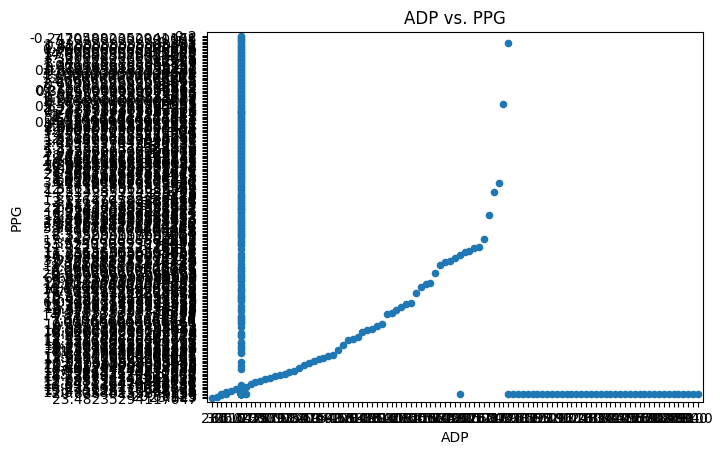

In [ ]:
# Converting columns to string type
player_df_with_adp['adp'] = player_df_with_adp['adp'].astype(str)
player_df_with_adp['ppg'] = player_df_with_adp['ppg'].astype(str)

player_df_with_adp.plot(x='adp', y='ppg', kind='scatter', style='o')
plt.xlabel('ADP')
plt.ylabel('PPG')
plt.title('ADP vs. PPG')
plt.margins(x=0.01, y=0.01)

plt.show()